In [0]:
# import your tools

In [0]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import math
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy import stats
from numpy import array
from pylab import * 


In [0]:
df = pd.read_excel(r"/content/Project_1_Data.xlsx")

print(df)

In [0]:
# data is from https://www.transfermarkt.us/

In [0]:
# Total Expenditures per Season

exp_per_season = array([796.76, 773.3, 883.53, 1053.85, 1406.52, 1669.27, 
                        1890.85, 2481.33, 1829.36])
season = array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])



In [0]:
# Means by Season: Exp per point & Exp per Season

exp_per_season_mean = array([39.84, 36.48, 44.18, 52.69, 70.33, 83.46, 94.54, 
                            124.07, 91.47])
exp_per_point_mean = array([0.69, 0.65781, 0.83572, 0.94672, 1.227, 1.74292, 
                            1.77927, 2.21981, 1.91318])

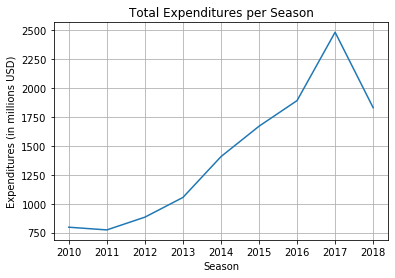

In [0]:
# visual aid re increase in expenditures since 2010

plot(season, exp_per_season)

xlabel('Season')
ylabel('Expenditures (in millions USD)')
title('Total Expenditures per Season')
grid(True)
show()


In [0]:
# Correlation between total points per season and total expenditures per season?

total_points_per_season = array([1029, 1047, 1032, 1062, 1047, 1033, 1056, 1041, 1069])

exp_points_corr = pd.DataFrame({"exp_per_season": exp_per_season, "total_points_per_season": total_points_per_season})
exp_points_corr[['exp_per_season', 'total_points_per_season']].corr()

,exp_per_season,total_points_per_season
exp_per_season,1.00000,0.25892
total_points_per_season,0.25892,1.00000


In [0]:
# NOPE

In [0]:
df.isnull().sum()

Club                       0
Season                     0
Expenditure                0
Income                     0
Net                        0
Points                     0
Expenditure per Point      0
Unnamed: 7               179
dtype: int64

In [0]:
# Big Six Teams represent 53% of all expenditures since 2010, 
# but only 42% of all points since 2010. What's going on?
# big six teams are paying a premium

big6_exp = array([548.94, 446.02, 510.66, 630.09, 860.40, 773.83, 919.83, 
                  1396.08, 674.12])
total_exp = array([796.76, 729.64, 883.53, 1053.85, 1406.52, 1669.27, 1890.85, 
                   2481.33, 1696.55])
big6_points = array([410, 433, 448, 464, 437, 383, 477, 466, 474])

big6_exp_percent = big6_exp/total_exp
print(big6_exp_percent)

[0.68896531 0.61128776 0.57797698 0.59789344 0.61172255 0.4635739
 0.48646376 0.56263375 0.39734756]


In [0]:

df_big6 = pd.DataFrame({"big6_exp": big6_exp, "big6_points": big6_points})
df_big6[['big6_exp', 'big6_points']].corr()

,big6_exp,big6_points
big6_exp,1.000000,0.303884
big6_points,0.303884,1.000000


In [0]:
ARS = df[df['Club'] == 'ARS']
MAN = df[df['Club'] == 'MAN']
MCI = df[df['Club'] == 'MCI']
TOT = df[df['Club'] == 'TOT']
CHE = df[df['Club'] == 'CHE']
LIV = df[df['Club'] == 'LIV']
EVE = df[df['Club'] == 'EVE']
EPA = np.array([0.69078, 0.65781, 0.83572, 0.94672, 1.227, 1.74292, 1.77927, 
            2.21981, 1.91318])
# EPA = Expenditures per Point Average by season

In [0]:
data = df['Expenditure per Point']

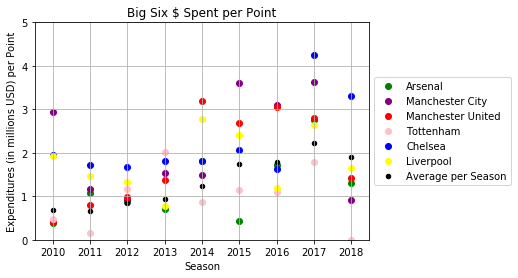

In [0]:
# Big Six $ Spent per Point

plt.scatter(ARS['Season'], ARS['Expenditure per Point'].abs(), color='green', label="Arsenal")
plt.scatter(MCI['Season'], MCI['Expenditure per Point'].abs(), color='purple', label="Manchester City")
plt.scatter(MAN['Season'], MAN['Expenditure per Point'].abs(), color='red', label="Manchester United")
plt.scatter(TOT['Season'], TOT['Expenditure per Point'].abs(), color='pink', label="Tottenham")
plt.scatter(CHE['Season'], CHE['Expenditure per Point'].abs(), color='blue', label="Chelsea")
plt.scatter(LIV['Season'], LIV['Expenditure per Point'].abs(), color='yellow', label="Liverpool")
plt.scatter(season, EPA, color='black', s=20, label="Average per Season") 
plt.xlabel('Season')
plt.ylabel('Expenditures (in millions USD) per Point')
title('Big Six $ Spent per Point')
grid(True)
plt.ylim(0, 5)
plt.legend() 
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=1)
plt.show()

In [0]:
# Correlation Values for every club with at least five seasons since 2010

In [0]:
# Arsenal Correlation between expenditures and points

ARS_Exp = array([91, 174, 129, 30, 136, 56, 64, 75, 26])
ARS_Points = array([70, 63, 75, 71, 75, 79, 73, 70, 68])
df_ARS = pd.DataFrame({"ARS_Exp": ARS_Exp, "ARS_Points": ARS_Points})
df_ARS[['ARS_Exp', 'ARS_Points']].corr()


,ARS_Exp,ARS_Points
ARS_Exp,1.000000,-0.231747
ARS_Points,-0.231747,1.000000


In [0]:
ARS_Corr = -0.231747

In [0]:
# Chelsea Correlation between expenditures and points

CHE_Exp = array([238, 296.97, 151.39, 103.17, 156.98, 148.6, 125.06, 109.95, 138.51])
CHE_Points = array([72, 70, 93, 50, 87, 82, 75, 64, 71])
df_CHE = pd.DataFrame({"CHE_Exp": CHE_Exp, "CHE_Points": CHE_Points})
df_CHE[['CHE_Exp', 'CHE_Points']].corr()


,CHE_Exp,CHE_Points
CHE_Exp,1.0000,0.1391
CHE_Points,0.1391,1.0000


In [0]:
CHE_Corr = 0.1391

In [0]:
# Tottenham Correlation between expenditures and points

TOT_Exp = array([0, 138.51, 95.19, 80.94, 55.26, 138.94, 83.51, 10.77, 30.32])
TOT_Points = array([71, 77, 86, 70, 64, 69, 72, 69, 62])
df_TOT = pd.DataFrame({"TOT_Exp": TOT_Exp, "TOT_Points": TOT_Points})
df_TOT[['TOT_Exp', 'TOT_Points']].corr()


,TOT_Exp,TOT_Points
TOT_Exp,1.000000,0.428894
TOT_Points,0.428894,1.000000


In [0]:
TOT_Corr = 0.428894

In [0]:
# Manchester United Correlation between expenditures and points

MAN_Exp = array([94.28, 226.18, 210.9, 177.84, 222.7, 87.93, 87.15, 71.02, 33.4])
MAN_Points = array([66, 81, 69, 66, 70, 64, 89, 89, 80])
df_MAN = pd.DataFrame({"MAN_Exp": MAN_Exp, "MAN_Points": MAN_Points})
df_MAN[['MAN_Exp', 'MAN_Points']].corr()


,MAN_Exp,MAN_Points
MAN_Exp,1.000000,-0.323952
MAN_Points,-0.323952,1.000000


In [0]:
MAN_Corr = -0.323952

In [0]:
# Manchester City Correlation between expenditures and points

MCI_Exp = array([89.59, 361.95, 242.39, 237.46, 117.19, 132.24, 70.62, 103.8, 209.31])
MCI_Points = array([98, 100, 78, 66, 79, 86, 78, 89, 71])
df_MCI = pd.DataFrame({"MCI_Exp": MCI_Exp, "MCI_Points": MCI_Points})
df_MCI[['MCI_Exp', 'MCI_Points']].corr()


,MCI_Exp,MCI_Points
MCI_Exp,1.00000,0.03208
MCI_Points,0.03208,1.00000


In [0]:
MCI_Corr = 0.03208

In [0]:
# Liverpool Correlation between expenditures and points

LIV_Exp = array([160.85, 198.22, 91.09, 144.21, 172.63, 66.23, 80.48, 75.84, 111.18])
LIV_Points = array([97, 75, 76, 60, 62, 84, 61, 52, 58])
df_LIV = pd.DataFrame({"LIV_Exp": LIV_Exp, "LIV_Points": LIV_Points})
df_LIV[['LIV_Exp', 'LIV_Points']].corr()


,LIV_Exp,LIV_Points
LIV_Exp,1.000000,0.209822
LIV_Points,0.209822,1.000000


In [0]:
LIV_Corr = 0.209822

In [0]:
# Everton Correlation between expenditures and points

EVE_Exp = array([113.77, 231.65, 97.93, 55.75, 45.78, 36.25, 24.68, 8.21, 1.94])
EVE_Points = array([54, 49, 61, 47, 47, 72, 63, 56, 54])
df_EVE = pd.DataFrame({"EVE_Exp": EVE_Exp, "EVE_Points": EVE_Points})
df_EVE[['EVE_Exp', 'EVE_Points']].corr()


,EVE_Exp,EVE_Points
EVE_Exp,1.000000,-0.306013
EVE_Points,-0.306013,1.000000


In [0]:
EVE_Corr = -0.306013

In [0]:
# STK Correlation between expenditures and points

STK_Exp = array([65.78, 44.2, 61.16, 2.05, 7.98, 27, 28, 45])
STK_Points = array([33, 44, 51, 54, 50, 42, 45, 46])
df_STK = pd.DataFrame({"STK_Exp": STK_Exp, "STK_Points": STK_Points})
df_STK[['STK_Exp', 'STK_Points']].corr()


,STK_Exp,STK_Points
STK_Exp,1.000000,-0.590978
STK_Points,-0.590978,1.000000


In [0]:
STK_Corr = -0.590978

In [0]:
# WHU Correlation between expenditures and points

WHU_Exp = array([107.05, 64.74, 95.19, 60.08, 40.07, 27.36, 27.24, 18.04])
WHU_Points = array([52, 42, 45, 62, 47, 40, 46, 33])
df_WHU = pd.DataFrame({"WHU_Exp": WHU_Exp, "WHU_Points": WHU_Points})
df_WHU[['WHU_Exp', 'WHU_Points']].corr()


,WHU_Exp,WHU_Points
WHU_Exp,1.00000,0.47911
WHU_Points,0.47911,1.00000


In [0]:
WHU_Corr = 0.47911

In [0]:
# Newcastle Correltaion between expenditures and points

NEW_Exp = array([68.12, 50.50, 123.02, 51.32, 4.33, 36.44, 29.7, 15.94])
NEW_Points = array([45, 44, 37, 39, 49, 41, 65, 46])
df_NEW = pd.DataFrame({"NEW_Exp": NEW_Exp, "NEW_Points": NEW_Points})
df_NEW[['NEW_Exp', 'NEW_Points']].corr()


,NEW_Exp,NEW_Points
NEW_Exp,1.000000,-0.512115
NEW_Points,-0.512115,1.000000


In [0]:
NEW_Corr = -0.512115

In [0]:
# West Brom correlation values

WBA_Exp = array([60.99, 43.21, 48.91, 28.37, 17.9, 5.7, 10.42, 15.77])
WBA_Points = array([31, 45, 43, 44, 36, 49, 47, 47])
df_WBA = pd.DataFrame({"WBA_Exp": WBA_Exp, "WBA_Points": WBA_Points})
df_WBA[['WBA_Exp', 'WBA_Points']].corr()


,WBA_Exp,WBA_Points
WBA_Exp,1.000000,-0.631866
WBA_Points,-0.631866,1.000000


In [0]:
WBA_Corr = -0.631866

In [0]:
# Southampton Correlation 

SOU_Exp = array([70.97, 69.83, 87.55, 68.51, 109.44, 45.14, 47.31])
SOU_Points = array([39, 36, 46, 63, 60, 56, 41])
df_SOU = pd.DataFrame({"SOU_Exp": SOU_Exp, "SOU_Points": SOU_Points})
df_SOU[['SOU_Exp', 'SOU_Points']].corr()


,SOU_Exp,SOU_Points
SOU_Exp,1.000000,0.249539
SOU_Points,0.249539,1.000000


In [0]:
SOU_Corr = 0.249539

In [0]:
# Swansea Correlation 

SWA_Exp = array([83.66, 66.23, 24.86, 47.34, 30.34, 23.34, 14.65])
SWA_Points = array([33, 41, 47, 56, 42, 46, 47])
df_SWA = pd.DataFrame({"SWA_Exp": SWA_Exp, "SWA_Points": SWA_Points})
df_SWA[['SWA_Exp', 'SWA_Points']].corr()


,SWA_Exp,SWA_Points
SWA_Exp,1.000000,-0.570044
SWA_Points,-0.570044,1.000000


In [0]:
SWA_Corr = -0.570044

In [0]:
# Sunderland Correlation

SUN_Exp = array([47.44, 75.3, 25.78, 38.66, 43.66, 32.21, 33.17])
SUN_Points = array([24, 39, 38, 38, 39, 45, 47])
df_SUN = pd.DataFrame({"SUN_Exp": SUN_Exp, "SUN_Points": SUN_Points})
df_SUN[['SUN_Exp', 'SUN_Points']].corr()


,SUN_Exp,SUN_Points
SUN_Exp,1.000000,-0.264788
SUN_Points,-0.264788,1.000000


In [0]:
SUN_Corr = -0.264788

In [0]:
# Aston Villa correlation

AVL_Exp = array([75.87, 15.33, 22.62, 31.73, 23.18, 42.64])
AVL_Points = array([17, 38, 38, 41, 38, 48])
df_AVL = pd.DataFrame({"AVL_Exp": AVL_Exp, "AVL_Points": AVL_Points})
df_AVL[['AVL_Exp', 'AVL_Points']].corr()


,AVL_Exp,AVL_Points
AVL_Exp,1.000000,-0.691513
AVL_Points,-0.691513,1.000000


In [0]:
AVL_Corr = -0.691513

In [0]:
# crystal palace correlation value

CRY_Exp = array([13.51, 55.8, 115.48, 32.83, 35.59, 37.61])
CRY_Points = array([49, 44, 41, 42, 48, 45])
df_CRY = pd.DataFrame({"CRY_Exp": CRY_Exp, "CRY_Points": CRY_Points})
df_CRY[['CRY_Exp', 'CRY_Points']].corr()


,CRY_Exp,CRY_Points
CRY_Exp,1.000000,-0.719378
CRY_Points,-0.719378,1.000000


In [0]:
CRY_Corr = -0.719378

In [0]:
# Fulham correlation value

FUL_Exp = array([132.81, 33.63, 11.4, 20.63, 12.6])
FUL_Points = array([26, 32, 43, 52, 49])
df_FUL = pd.DataFrame({"FUL_Exp": FUL_Exp, "FUL_Points": FUL_Points})
df_FUL[['FUL_Exp', 'FUL_Points']].corr()


,FUL_Exp,FUL_Points
FUL_Exp,1.000000,-0.795949
FUL_Points,-0.795949,1.000000


In [0]:
FUL_Corr = -0.795949

In [0]:
# Leicester correlation value

LEI_Exp = array([130.64, 99.98, 104.42, 56.89, 26.06])
LEI_Points = array([52, 47, 44, 81, 41])
df_LEI = pd.DataFrame({"LEI_Exp": LEI_Exp, "LEI_Points": LEI_Points})
df_LEI[['LEI_Exp', 'LEI_Points']].corr()


,LEI_Exp,LEI_Points
LEI_Exp,1.0000,-0.1448
LEI_Points,-0.1448,1.0000


In [0]:
LEI_Corr = -0.1448

In [0]:
# Diverging Text Bars of Club Correlation re expenditures & points

In [0]:
club_corr = array(['Leicester', 'Fulham', 'Crystal Palace', 'Aston Villa', 
                   'Sunderland', 'Swansea', 'Southampton', 'West Brom', 
                   'Newcastle', 'West Ham', 'Stoke', 'Everton', 'Liverpool', 
                   'Manchester City', 'Manchester United', 'Tottenham', 
                   'Chelsea', 'Arsenal'])
corr_values = array([LEI_Corr, FUL_Corr, CRY_Corr, AVL_Corr, SUN_Corr, 
                     SWA_Corr, SOU_Corr, WBA_Corr, NEW_Corr, WHU_Corr, 
                     STK_Corr, EVE_Corr, LIV_Corr, MCI_Corr, MAN_Corr, 
                     TOT_Corr, CHE_Corr, ARS_Corr])


In [0]:
df_Corr = pd.DataFrame({"corr_values": corr_values, "club_corr": club_corr})
df_Corr = df_Corr.sort_values(by='corr_values')
print(df_Corr)

    corr_values          club_corr
1     -0.795949             Fulham
2     -0.719378     Crystal Palace
3     -0.691513        Aston Villa
7     -0.631866          West Brom
10    -0.590978              Stoke
5     -0.570044            Swansea
8     -0.512115          Newcastle
14    -0.323952  Manchester United
11    -0.306013            Everton
4     -0.264788         Sunderland
17    -0.231747            Arsenal
0     -0.144800          Leicester
13     0.032080    Manchester City
16     0.139100            Chelsea
12     0.209822          Liverpool
6      0.249539        Southampton
15     0.428894          Tottenham
9      0.479110           West Ham


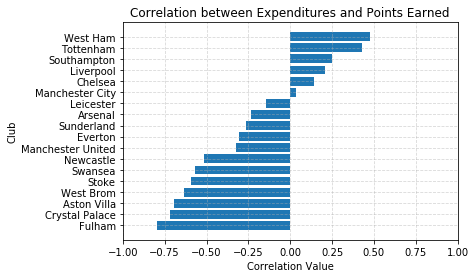

In [0]:
y_pos = np.arange(len(df_Corr['club_corr']))
plt.barh(y_pos, df_Corr['corr_values'], align='center')
plt.yticks(y_pos, df_Corr['club_corr'])
plt.xlabel('Correlation Value')
plt.ylabel('Club')
plt.title('Correlation between Expenditures and Points Earned')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-1, 1)
plt.show()